In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [9]:
df = pd.read_csv("dataIQIYI-Copy1.csv")

In [22]:
# Chuyển đổi nhãn về dạng số
#label_encoder = LabelEncoder()
#df['Hot'] = label_encoder.fit_transform(df['Hot'])

# Chọn các đặc điểm để dự đoán HOT
X = df[['number_of_rating', 'rating_score', 'Lãng Mạn', 'Tình Tiết', 'Thanh Xuân', 'Thành Thị', 'Viễn Tưởng', 'Phim Hài', 'Bí Ẩn', 'Hành Động', 'Cổ Trang', 'Tình Bạn', 'Phiêu Lưu', 'Tội Phạm', 'Tình Yêu Ngọt Ngào', 'Gia Đình', 'Nhiệt Huyết', 'Kinh Dị', 'Tiểu Thuyết Chuyển Thể', 'Other']].values
y = df['hot'].values
# Chuyển đổi nhãn về dạng số
#
le = LabelEncoder()
y = le.fit_transform(df['hot'])
print("Nhãn tương ứng:")
for label, class_name in enumerate(le.classes_):
    print(f"{label}: {class_name}")
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tạo mô hình k-NN với k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán nhãn của các mẫu trong tập kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Nhãn tương ứng:
0: 0
1: 1
Accuracy: 0.9285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       283
           1       0.75      0.62      0.68        39

    accuracy                           0.93       322
   macro avg       0.85      0.79      0.82       322
weighted avg       0.92      0.93      0.93       322



In [32]:
#y_pred
df_predictions = pd.DataFrame(y_pred, columns=['Predictions'])
df_predictions

,Predictions
0,0
1,0
2,1
3,0
4,0
...,...
317,0
318,0
319,0
320,0


<Figure size 800x600 with 0 Axes>

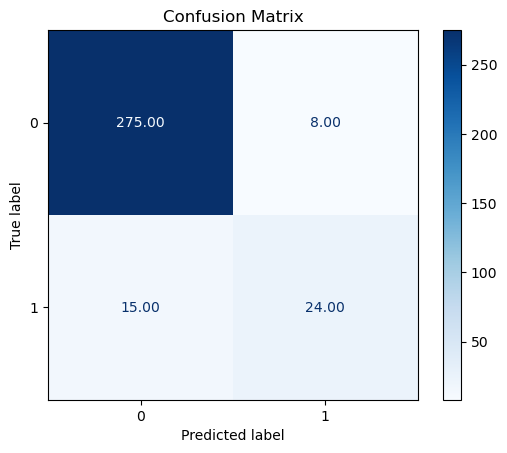

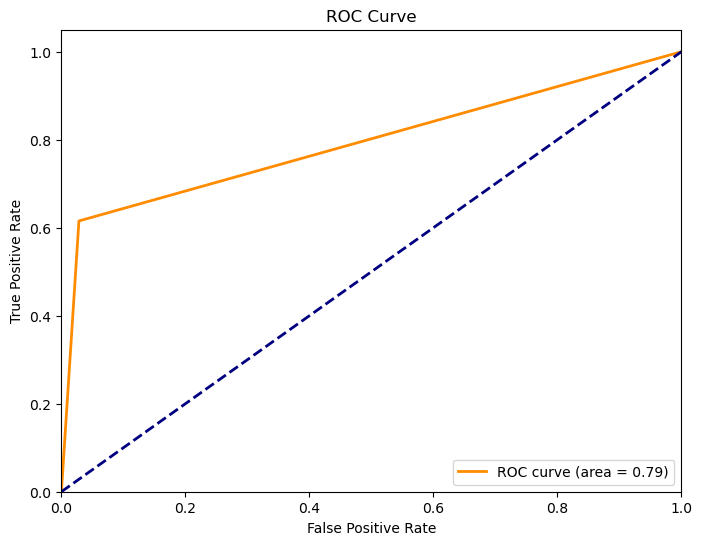

In [24]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=knn.classes_).plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
